<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib.lines import Line2D

import ipycytoscape
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numpy as np
import pandas as pd
import pickle
import os
import re
import itertools as itr
from enm.visualize.visualize import plot_correlation_density, plot_vector, plot_lambda_collectivity
from enm.enm import Enm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%load_ext rpy2.ipython


/home/oma21/miniconda3/envs/enm/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [3]:
sgd_tab_df = pd.read_csv('../data/raw/ontology/SGD_features.tab','\t',header=None)


In [111]:
n=20
ba = nx.barabasi_albert_graph(n,2)
nx.relabel_nodes(ba,dict(zip(range(n),sgd_tab_df.iloc[:n,0])),copy=False)

In [160]:
e_ba = Enm('ba')
e_ba.G = ba
#e_ba.nodes = e_ba.graph_gc.node
e_ba.giant_component()
e_ba.gnm_analysis(no_diag=False)

@> 19 modes were calculated in 0.00s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [161]:
prs_mat = e_ba.prs_mat

prs_mat_df = pd.DataFrame(prs_mat,columns=e_ba.graph_gc.nodes, index=e_ba.graph_gc.nodes)

In [162]:
e_ba.df.sort_values('eff')

,orf_name,deg,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,eig_7,eff,sens,btw,trans,eigenvec_centr,closeness_centr,smallest_eigenvec
1,S000031098,1,-0.228926,-0.561735,-0.027840,-0.026461,-0.156672,-0.019099,-0.201055,0.008317,1.075751,1.922511,0.0,0.000000,0.098463,0.422222,-0.561735
4,S000121252,2,0.044433,-0.072975,-0.013032,-0.193738,0.009156,-0.048083,0.096197,0.004072,1.092669,1.259189,0.0,1.000000,0.189613,0.475000,-0.072975
5,S000028862,2,0.257639,-0.009591,-0.049961,-0.063813,0.303857,-0.120934,0.048619,0.099497,1.131072,1.431680,0.0,1.000000,0.164636,0.452381,-0.009591
19,S000037154,2,-0.072438,0.071424,-0.109878,0.166542,0.654864,-0.149229,0.214372,0.180964,1.148927,1.515500,0.0,1.000000,0.147476,0.452381,0.071424
9,S000002142,3,-0.060091,0.082092,0.103029,0.572004,0.021351,0.178400,0.003544,0.211052,1.173779,1.132269,0.0,0.333333,0.218075,0.513514,0.082092
12,S000031368,2,0.448521,-0.073046,0.211380,-0.142638,-0.285639,0.024889,0.471092,-0.034709,1.216000,1.486874,0.0,0.000000,0.135716,0.441860,-0.073046
14,S000000062,2,-0.074405,-0.182404,0.141037,-0.073676,-0.267208,0.024478,-0.070532,-0.030468,1.231395,1.744114,0.0,1.000000,0.138674,0.431818,-0.182404
16,S000000061,2,-0.435303,0.279853,-0.134372,0.367941,-0.362055,-0.049078,0.198843,-0.189111,1.252177,1.626524,0.0,0.000000,0.111305,0.452381,0.279853
17,S000029887,2,0.338891,0.272498,0.324497,0.032952,-0.068820,-0.174830,-0.598402,0.028927,1.254804,1.783135,0.0,0.000000,0.094128,0.395833,0.272498
18,S000001817,2,-0.146580,-0.357540,-0.245642,-0.180243,0.163252,0.074912,-0.140792,-0.030433,1.337909,2.069550,0.0,0.000000,0.089407,0.358491,-0.357540


In [193]:
nx.get_edge_attributes(nx.barabasi_albert_graph(10,1), 'weight') == {}

True

In [194]:
nx.get_edge_attributes(g, 'weight')== {}

False

In [178]:
source_node = e_ba.df.sort_values('eff').orf_name.tolist()[-1]
target_node = e_ba.df.sort_values('sens').orf_name.tolist()[-1]
g= ba
nx.set_edge_attributes(g,0,'weight')
get_col = True # if this is true, you get all responses(columns) for perturbing source node, else you get all perturbations(rows) for this node's response
if get_col:
    gene_perturb_profile = prs_mat_df.loc[source_node,:]
else:
    gene_perturb_profile = prs_mat_df.loc[:,source_node]

In [179]:
nx.set_node_attributes(g, gene_perturb_profile.to_dict(), name = 'perturb_profile')

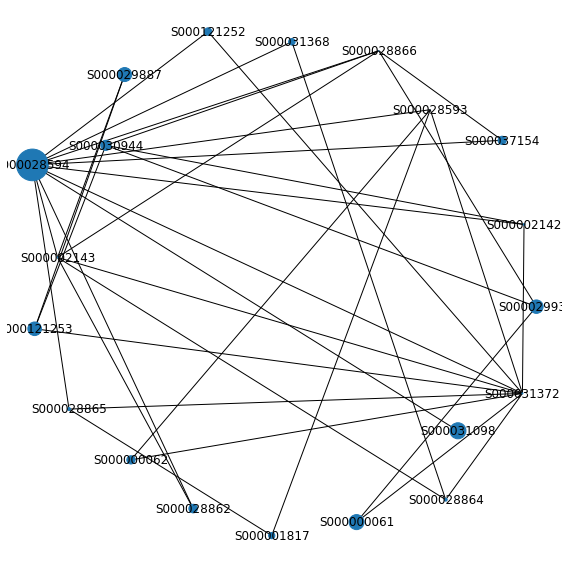

In [180]:
fig, ax = plt.subplots(figsize=(8,8))
pos = nx.spring_layout(g,scale=0.1)
nx.draw(g, pos=pos,ax=ax,
       node_size = [1000*j for i,j in g.nodes('perturb_profile')],with_labels=True)
plt.tight_layout()

In [181]:
nx.shortest_path(g,source_node,target_node)

['S000028594', 'S000028865', 'S000001817']

In [182]:
node_weight = (1/prs_mat_df.loc[source_node,:]).to_dict()#dict(zip( g.nodes , range(len(g.nodes))))

In [183]:
node_weight['S000028865']

117.4829956264754

In [187]:
nx.single_source_dijkstra_path(g,source=source_node,weight='weight', node_weight=node_weight)[target_node]

['S000028594', 'S000028865', 'S000001817']

In [203]:
e_ba.get_prs_weighted_path(source=source_node)[1]

{'S000028594': ['S000028594'],
 'S000002143': ['S000028594', 'S000002143'],
 'S000031098': ['S000028594', 'S000031098'],
 'S000031372': ['S000028594', 'S000031372'],
 'S000121252': ['S000028594', 'S000121252'],
 'S000028862': ['S000028594', 'S000028862'],
 'S000028865': ['S000028594', 'S000028865'],
 'S000028866': ['S000028594', 'S000028866'],
 'S000002142': ['S000028594', 'S000002142'],
 'S000028593': ['S000028594', 'S000028593'],
 'S000031368': ['S000028594', 'S000031368'],
 'S000037154': ['S000028594', 'S000037154'],
 'S000028864': ['S000028594', 'S000031368', 'S000028864'],
 'S000001817': ['S000028594', 'S000028865', 'S000001817'],
 'S000030944': ['S000028594', 'S000002142', 'S000030944'],
 'S000121253': ['S000028594', 'S000002142', 'S000030944', 'S000121253'],
 'S000029932': ['S000028594', 'S000002142', 'S000030944', 'S000029932'],
 'S000029887': ['S000028594',
  'S000002142',
  'S000030944',
  'S000121253',
  'S000029887'],
 'S000000061': ['S000028594',
  'S000002142',
  'S000030

In [ ]:
nx.all_pairs_dijkstra_path



In [119]:
%%R
library(igraph)
library(diffusr)

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union




In [136]:
%%R
n=100
source = 1
p0    <- rep(0,n)
ba <- barabasi.game(n,1,directed=F)

p0[source] <-1
graph <- as.matrix(as_adj(ba))
pt    <- random.walk(p0, graph, niter=1000000, correct.for.hubs=T)
pt

R[write to console]: Correcting for hub degrees.

R[write to console]: normalizing column vectors!



$p.inf
               [,1]
  [1,] 5.561057e-01
  [2,] 4.343601e-02
  [3,] 3.922962e-02
  [4,] 3.933052e-02
  [5,] 3.790162e-03
  [6,] 2.519398e-04
  [7,] 4.354851e-03
  [8,] 2.103052e-04
  [9,] 2.103052e-04
 [10,] 4.012432e-02
 [11,] 3.551690e-03
 [12,] 3.103347e-04
 [13,] 3.103347e-04
 [14,] 4.343601e-02
 [15,] 7.832946e-03
 [16,] 5.153098e-03
 [17,] 4.343423e-05
 [18,] 3.103347e-04
 [19,] 3.260025e-03
 [20,] 3.756544e-04
 [21,] 3.680994e-05
 [22,] 2.492255e-04
 [23,] 2.519398e-04
 [24,] 3.792753e-04
 [25,] 4.193795e-02
 [26,] 4.343423e-05
 [27,] 5.300763e-06
 [28,] 2.638490e-04
 [29,] 7.798568e-03
 [30,] 1.087888e-04
 [31,] 3.680994e-05
 [32,] 3.680994e-05
 [33,] 1.420668e-03
 [34,] 4.043543e-05
 [35,] 1.356057e-03
 [36,] 3.475469e-02
 [37,] 4.562113e-04
 [38,] 2.670463e-04
 [39,] 3.947601e-04
 [40,] 3.680994e-05
 [41,] 1.672374e-04
 [42,] 1.420668e-03
 [43,] 7.198235e-03
 [44,] 4.487220e-04
 [45,] 3.285731e-03
 [46,] 6.405295e-03
 [47,] 1.455574e-03
 [48,] 5.300763e-06
 [49,] 1.7386

 [83,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [84,] 0.0000000 0.2121212     0     0   0.0 0.0000000 0.0000000  0.00     0
 [85,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [86,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [87,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [88,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [89,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.1428571  0.00     0
 [90,] 0.1454545 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [91,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [92,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [93,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [94,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.00     0
 [95,] 0.0000000 0.0000000     0     0   0.0 0.0000000 0.0000000  0.25     0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.0000000 0.0000000
 [31,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [32,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [33,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [34,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [35,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [36,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [37,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [38,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [39,] 0.0000000 0.0000000   0.0     0 0.3333333     0 0.0000000 0.0000000
 [40,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [41,] 0.0000000 0.0000000   0.7     0 0.0000000     0 0.0000000 0.0000000
 [42,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [43,] 0.0000000 0.0000000   0.0     0 0.0000000     0 0.0000000 0.0000000
 [44

 [39,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [40,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [41,]     0     0     0     0     0     0 0.0000000  0.00     0     0     1
 [42,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [43,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [44,]     0     0     0     0     0     0 0.0000000  0.25     1     0     0
 [45,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [46,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [47,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [48,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [49,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [50,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0
 [51,]     0     0     0     0     0     0 0.0000000  0.00     0     0     0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     0     0     0     0     0
 [82,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [83,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [84,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [85,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [86,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [87,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [88,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [89,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [90,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [91,]     0     0     0     0   0.5     0     0     0     0     0     0     0
 [92,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [93,]     0     0     0     0   0.0     0     0     0     0     0     0     0
 [94,]     0     0   

In [137]:
%%R
sum(pt$p.inf)

[1] 1
